Análise base de dados Iris

In [1]:
import polars as pl
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)


Renomeando as colunas do Dataset e salvando em constantes para a utilização

In [3]:
c_sepala = 'comprimento da sépala (cm)'
l_sepala = 'largura da sépala (cm)'
c_petala = 'comprimento da pétala (cm)'
l_petala = 'largura da pétala (cm)'

iris.frame.rename(columns={
    'sepal length (cm)': c_sepala,
    'sepal width (cm)': l_sepala,
    'petal length (cm)': c_petala,
    'petal width (cm)': l_petala
}, inplace=True)

iris.frame.head()

,comprimento da sépala (cm),largura da sépala (cm),comprimento da pétala (cm),largura da pétala (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Cálculos Estatísticos

In [ ]:

def calcular_estatisticas(df: pl.DataFrame, coluna: None) -> None:

    media = df[coluna].mean()
    mediana = df[coluna].median()
    desvio_padrao = df[coluna].std()
    maximo = df[coluna].max()
    minimo = df[coluna].min()
    coeficiente_de_variacao = desvio_padrao / media *100
    
    print(f'Coluna: {coluna}')
    print(f'Média: {media}')
    print(f'Mediana: {mediana}')
    print(f'Desvio padrão: {desvio_padrao}')
    print(f'Máximo: {maximo}')
    print(f'Mínimo: {minimo}')
    print(f'Coeficiente de Variação: {coeficiente_de_variacao: .2f} %')
    print('------------------------')
    

def contar_valores_fora_limite(df: pl.DataFrame, coluna: str) -> tuple:
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    
    limite_superior = media + 3 * desvio_padrao
    limite_inferior = media - 3 * desvio_padrao
    print(f'Limite superior {coluna}: {limite_superior}')
    print(f'Limite inferior {coluna}: {limite_inferior}')

    maximo = df[coluna].max()
    minimo = df[coluna].min()

    print(f'Máximo {coluna}: {maximo}')
    print(f'Mínimo {coluna}: {minimo}')
    
    valores_acima = df.filter(df[coluna] > limite_superior).shape[0]
    valores_abaixo = df.filter(df[coluna] < limite_inferior).shape[0]
    print(f'Valores acima do limite superior: {valores_acima}')
    print(f'Valores abaixo do limite inferior: {valores_abaixo}')
    print('----------------------------')


# Zscore = (Valor - Media) / Desvio Padrão
# O Zscore indica quantos desvios padrão um valor está acima ou abaixo da média.

def calcular_zscore(df: pl.DataFrame, coluna: str) -> pl.DataFrame:
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    
    df_com_zscore = df.with_columns(
        ((df[coluna] - media) / desvio_padrao).alias(f'Zscore_{coluna}')
    )
    
    return df_com_zscore

Gráficos

In [ ]:
#Gráficos

def histograma(df: pd.DataFrame, coluna: str):
    # Plotando o histograma usando seaborn
    sns.histplot(x=df[coluna], color='blue')

def verificar_normalidade(df: pd.DataFrame, coluna: str):
    # Plotando o boxplot com a curva de densidade usando seaborn
    sns.boxplot(x=df[coluna], color='blue')

def verificar_linearidade(df: pd.DataFrame, coluna_x: str, coluna_y: str):
    # Plotando o gráfico de dispersão usando seaborn
    sns.scatterplot(x=df[coluna_x], y=df[coluna_y], color='green')


Análises Dataset

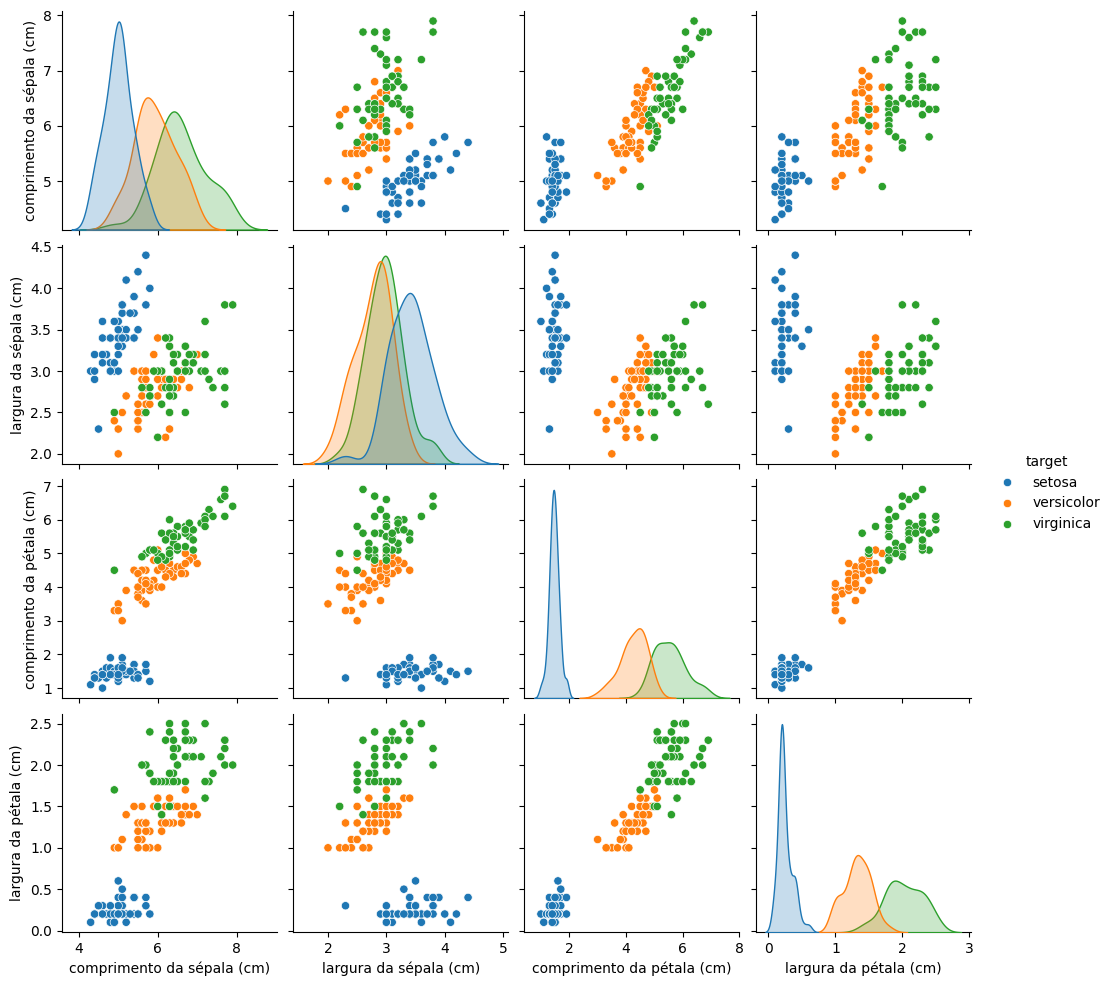

In [6]:
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

In [7]:
df = pl.from_pandas(iris.frame)

df.head

<bound method DataFrame.head of shape: (150, 5)
┌────────────────┬───────────────────┬────────────────────────┬────────────────────────┬───────────┐
│ comprimento da ┆ largura da sépala ┆ comprimento da pétala  ┆ largura da pétala (cm) ┆ target    │
│ sépala (cm)    ┆ (cm)              ┆ (cm)                   ┆ ---                    ┆ ---       │
│ ---            ┆ ---               ┆ ---                    ┆ f64                    ┆ str       │
│ f64            ┆ f64               ┆ f64                    ┆                        ┆           │
╞════════════════╪═══════════════════╪════════════════════════╪════════════════════════╪═══════════╡
│ 5.1            ┆ 3.5               ┆ 1.4                    ┆ 0.2                    ┆ setosa    │
│ 4.9            ┆ 3.0               ┆ 1.4                    ┆ 0.2                    ┆ setosa    │
│ 4.7            ┆ 3.2               ┆ 1.3                    ┆ 0.2                    ┆ setosa    │
│ 4.6            ┆ 3.1               ┆ 1.5 

In [8]:
calcular_estatisticas(df, c_sepala)
calcular_estatisticas(df, l_sepala)

Coluna: comprimento da sépala (cm)
Média: 5.843333333333334
Mediana: 5.8
Desvio padrão: 0.8280661279778629
Máximo: 7.9
Mínimo: 4.3
Coeficiente de Variação:  14.17 %
------------------------
Coluna: largura da sépala (cm)
Média: 3.0573333333333332
Mediana: 3.0
Desvio padrão: 0.4358662849366982
Máximo: 4.4
Mínimo: 2.0
Coeficiente de Variação:  14.26 %
------------------------


In [9]:
calcular_estatisticas(df, c_petala)
calcular_estatisticas(df, l_petala)

Coluna: comprimento da pétala (cm)
Média: 3.7579999999999996
Mediana: 4.35
Desvio padrão: 1.7652982332594664
Máximo: 6.9
Mínimo: 1.0
Coeficiente de Variação:  46.97 %
------------------------
Coluna: largura da pétala (cm)
Média: 1.1993333333333336
Mediana: 1.3
Desvio padrão: 0.7622376689603464
Máximo: 2.5
Mínimo: 0.1
Coeficiente de Variação:  63.56 %
------------------------


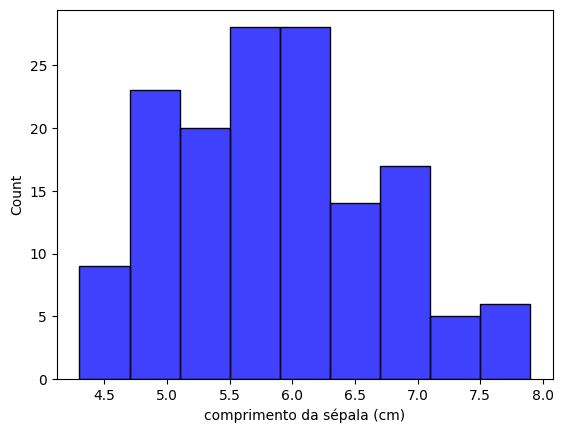

In [ ]:
histograma(iris.frame, c_sepala)

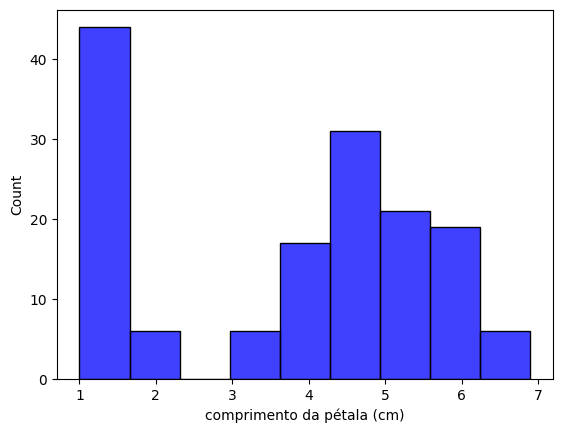

In [11]:
histograma(iris.frame, c_petala)

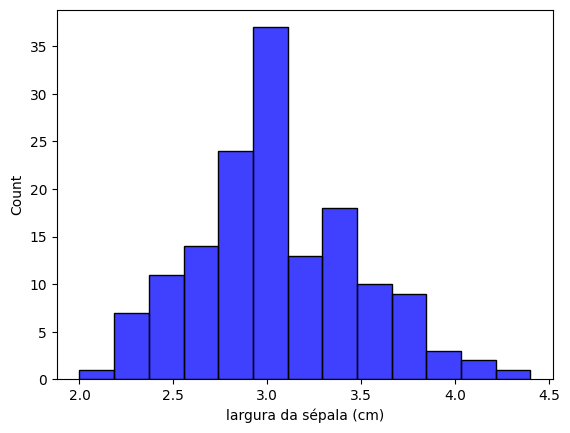

In [12]:
histograma(iris.frame, l_sepala)

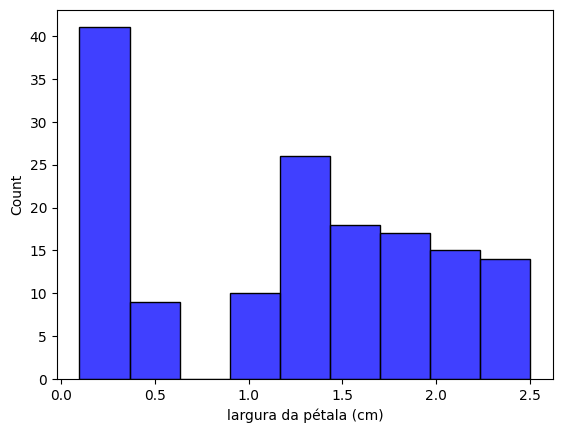

In [13]:
histograma(iris.frame, l_petala)

In [14]:
contar_valores_fora_limite(df, c_sepala)
contar_valores_fora_limite(df, l_sepala)
contar_valores_fora_limite(df, c_petala)
contar_valores_fora_limite(df, l_petala)

Limite superior comprimento da sépala (cm): 8.327531717266922
Limite inferior comprimento da sépala (cm): 3.3591349493997447
Máximo comprimento da sépala (cm): 7.9
Mínimo comprimento da sépala (cm): 4.3
Valores acima do limite superior: 0
Valores abaixo do limite inferior: 0
----------------------------
Limite superior largura da sépala (cm): 4.3649321881434275
Limite inferior largura da sépala (cm): 1.7497344785232385
Máximo largura da sépala (cm): 4.4
Mínimo largura da sépala (cm): 2.0
Valores acima do limite superior: 1
Valores abaixo do limite inferior: 0
----------------------------
Limite superior comprimento da pétala (cm): 9.053894699778398
Limite inferior comprimento da pétala (cm): -1.5378946997783998
Máximo comprimento da pétala (cm): 6.9
Mínimo comprimento da pétala (cm): 1.0
Valores acima do limite superior: 0
Valores abaixo do limite inferior: 0
----------------------------
Limite superior largura da pétala (cm): 3.4860463402143727
Limite inferior largura da pétala (cm): 

In [15]:
df_zscore = calcular_zscore(df, c_sepala)

In [16]:
outliers = df_zscore.filter((df_zscore['Zscore_comprimento da sépala (cm)'] > 3) | 
                            (df_zscore['Zscore_comprimento da sépala (cm)'] < -3))

outliers.head()

comprimento da sépala (cm),largura da sépala (cm),comprimento da pétala (cm),largura da pétala (cm),target,Zscore_comprimento da sépala (cm)
f64,f64,f64,f64,str,f64


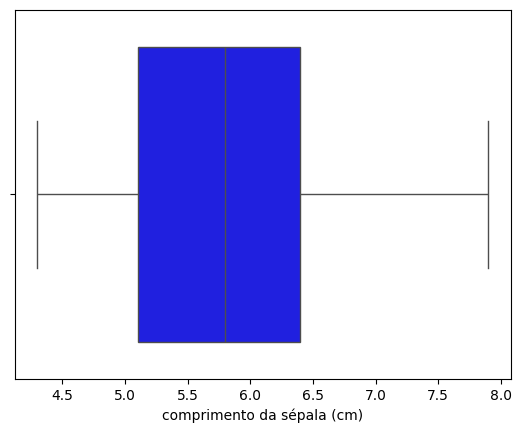

In [17]:
verificar_normalidade(iris.frame, c_sepala)

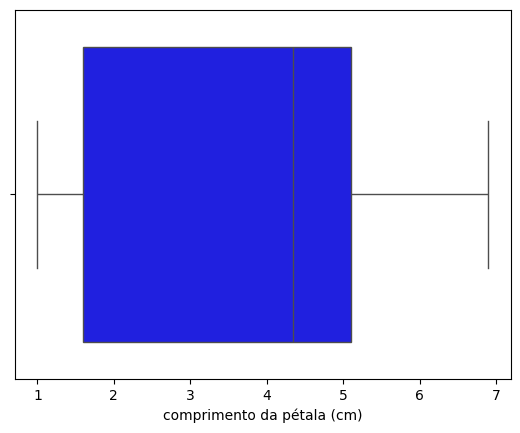

In [18]:
verificar_normalidade(iris.frame, c_petala)

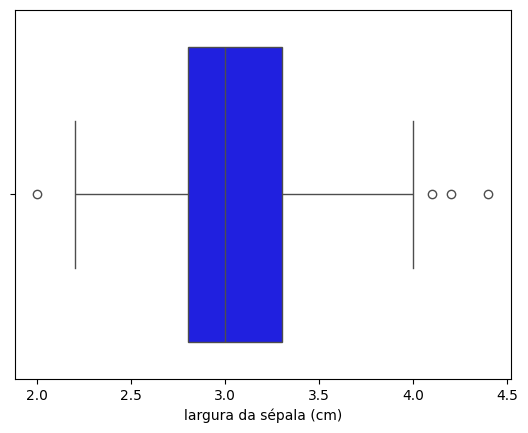

In [19]:
verificar_normalidade(iris.frame, l_sepala)

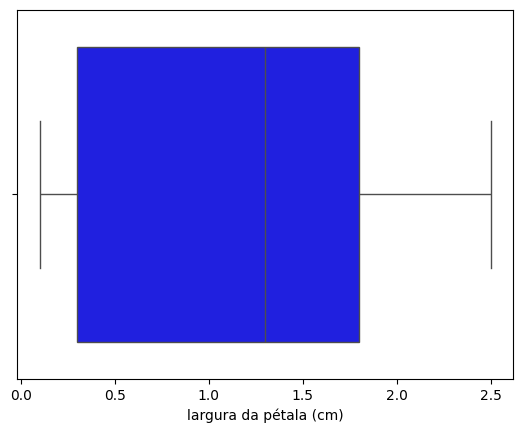

In [20]:
verificar_normalidade(iris.frame, l_petala)

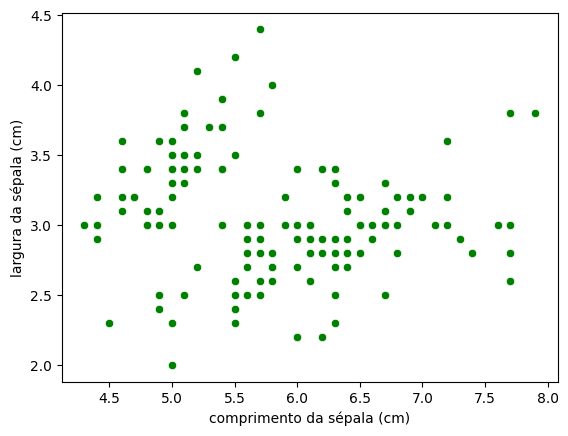

In [21]:
verificar_linearidade(iris.frame, c_sepala, l_sepala)

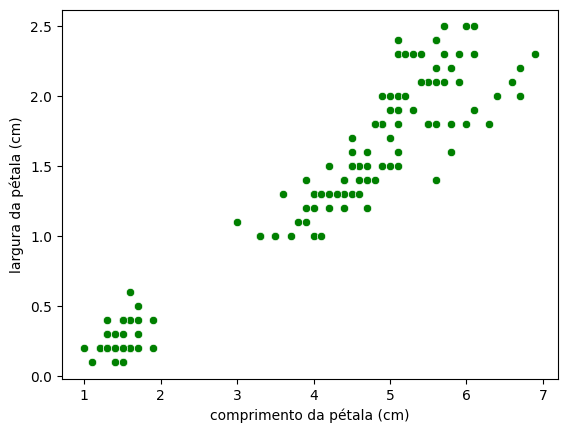

In [22]:
verificar_linearidade(iris.frame, c_petala, l_petala)